In [2]:
import pandas as pd

In [3]:
births= pd.read_csv("births.csv")
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [4]:
print (births['day'].isnull())

0        False
1        False
2        False
3        False
4        False
         ...  
15542     True
15543     True
15544     True
15545     True
15546     True
Name: day, Length: 15547, dtype: bool


In [5]:
births['day'].fillna(0, inplace= True)

In [6]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [7]:
#as day is showing float value , we can change it to int
births['day']=births['day'].astype(int)

In [8]:
births['decade']= 10 * (births['year']//10)

In [9]:
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')
print(births.head())

   year  month  day gender  births  decade
0  1969      1    1      F    4046    1960
1  1969      1    1      M    4440    1960
2  1969      1    2      F    4454    1960
3  1969      1    2      M    4548    1960
4  1969      1    3      F    4548    1960


We immediately see that male births outnumber female births in every decade. To see this trend a bit more clearly, we can use the built-in plotting tools in Pandas to visualize the total number of births by year :

<AxesSubplot:xlabel='decade'>

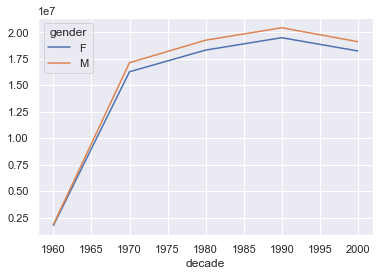

In [10]:
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set() 
birth_decade=births.pivot_table('births',index='decade', columns='gender', aggfunc='sum')
birth_decade.plot()

There are a few interesting features we can pull out of this dataset using the Pandas tools. We must start by cleaning the data a bit, removing outliers caused by mistyped dates or missing values. One easy way to remove these all at once is to cut outliers, we’ll do this via a robust sigma-clipping operation:

In [11]:
import numpy as np


In [12]:
quartiles= np.percentile(births['births'],[25,50,75])
mean=quartiles[1]
sigma= .74 * (quartiles[2]-quartiles[0])

This final line is a robust estimate of the sample mean, where the 0.74 comes from the interquartile range of a Gaussian distribution. With this we can use the query() method to filter out rows with births outside these values:

In [17]:
births = births.query(('births' > mean - 5 * sigma) and ('births' < mean + 5 * sigma))

TypeError: '<' not supported between instances of 'numpy.ndarray' and 'str'

In [18]:
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d') 
births['day of week'] = births.index.dayofweek

ValueError: unconverted data remains: 9

In [18]:
births['day of week'] = births.index.dayofweek

AttributeError: 'RangeIndex' object has no attribute 'dayofweek'

In [17]:
births_day = births.pivot_table('births', index='day of week',
                                columns='decade', aggfunc='mean')

KeyError: 'day of week'